In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
train = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('/content/test_Y3wMUE5_7gLdaTN.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train.shape,test.shape

((614, 13), (367, 12))

In [6]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
test.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [8]:
train.columns,test.columns

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

In [9]:
train.Loan_Status.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
#to visualise the variables splitting variables into categorical,continuous and ordinal data

categorical  = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area','Credit_History']
numerical = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
target = ['Loan_Status']

print(len(categorical),len(numerical),len(target))

7 4 1


Gender
Male      489
Female    112
Name: count, dtype: int64


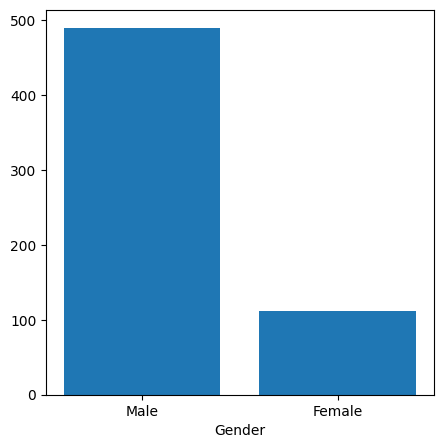

Married
Yes    398
No     213
Name: count, dtype: int64


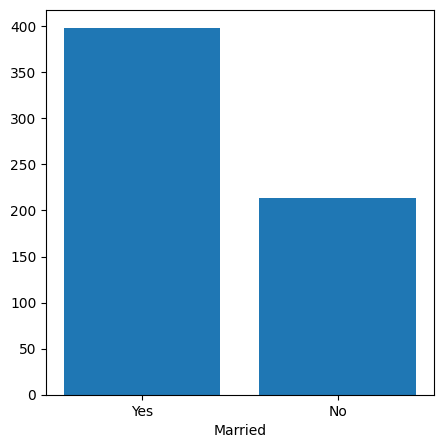

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


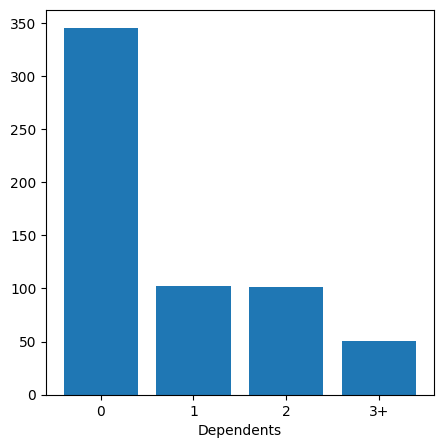

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


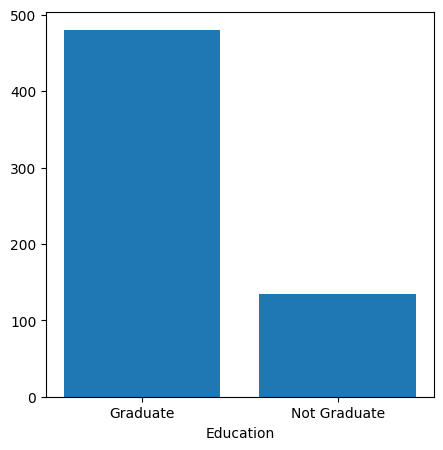

Self_Employed
No     500
Yes     82
Name: count, dtype: int64


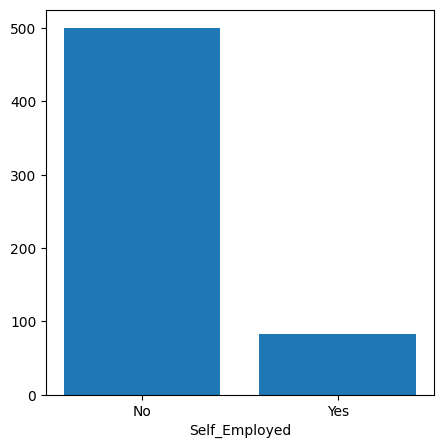

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


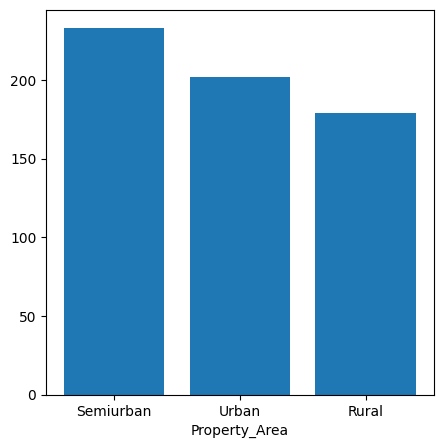

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64


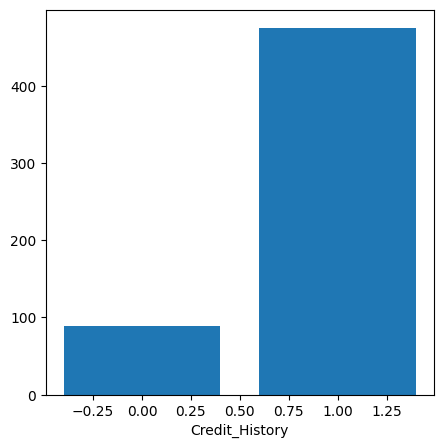

In [12]:
#now will do univariate visualisation of categorical data

for i in categorical:
  plt.figure(figsize = (5,5))
  counts = train[i].value_counts()
  print(counts)
  plt.bar(counts.index,counts.values)
  plt.xlabel(i)
  plt.show()


**observation**
1. 450+ applicants are male and out of them almost 400 are married.
2. almost 340 applicants have 0 dependents.
3. number of graduates applying for loan is higher than non graduates.
4. less than 100 applicants are self employed.
5. there is not much difference in the area where loan applicant lives.

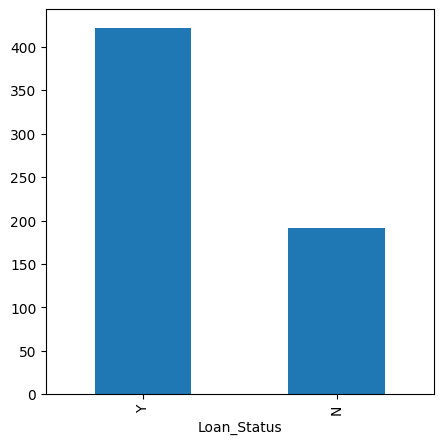

In [13]:
plt.figure(figsize = (5,5))
train['Loan_Status'].value_counts().plot.bar()
plt.show()

ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64


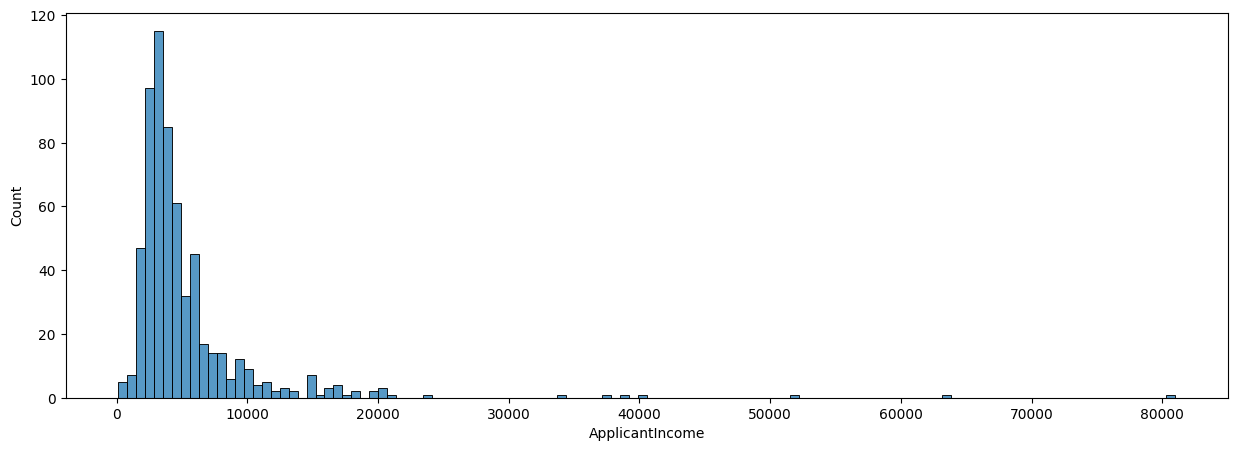

CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64


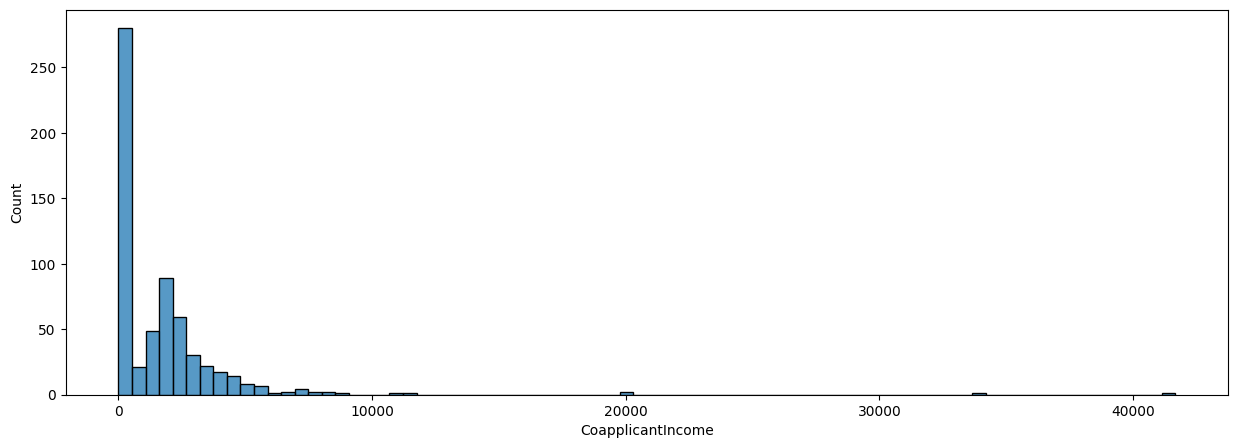

LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64


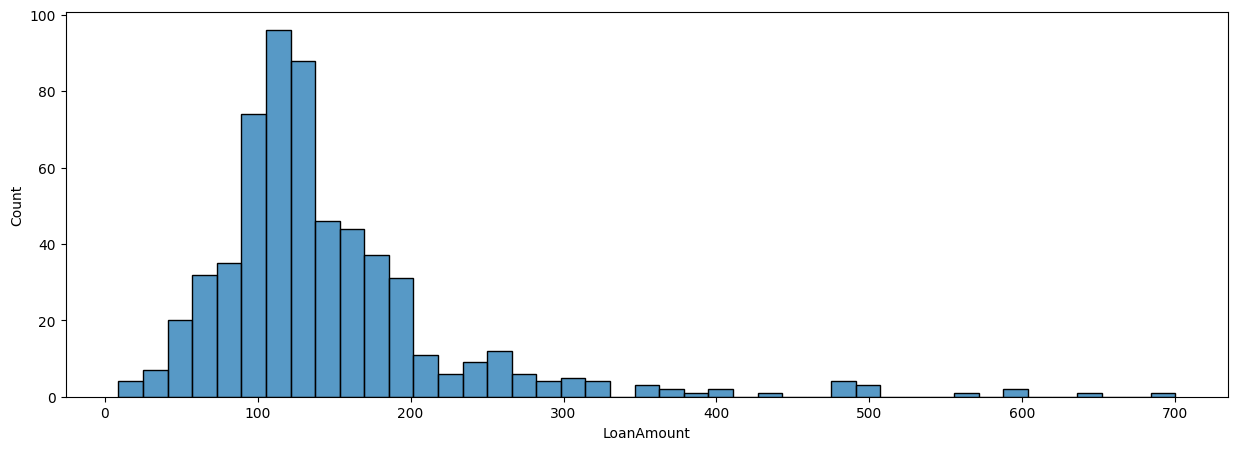

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


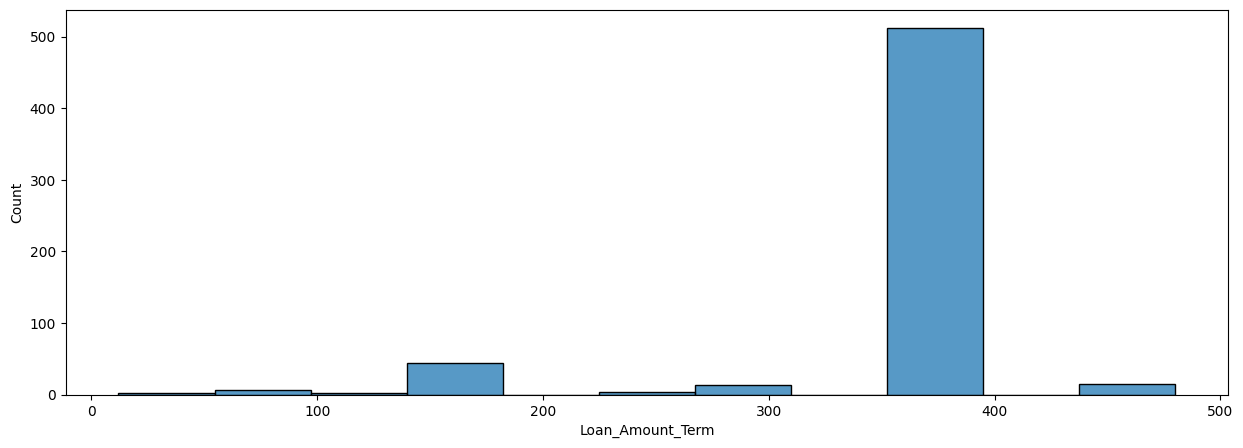

In [14]:
for i in numerical:
  print(train[i].value_counts(ascending = False))
  plt.figure(figsize = (15,5))
  sns.histplot(train[i])
  plt.show()


**observations**
1. ApplicantIncome : most applicants has income between 0 - 2000 and very few has more than 3000.
2. Co-applicant income :  co applicants has income between 0 - 1000 most has income 0 and few has income more than 1000 to 5000.
3. Loan amount: loan amount is between 5 to 700 and most has applied for loan of amount b/w 50 - 200 and some has applied for 200 - 300 and very few has applied for more than 300.
4. Loan amount term : more than 500 applicants has applied for term to be 360 and less than 100 applicants have applied for term to be 180 or less than that.

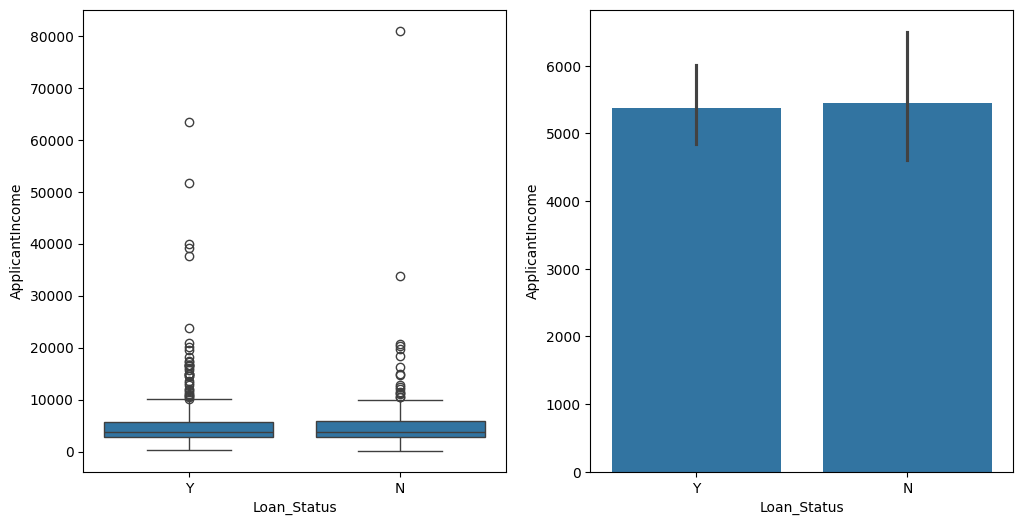

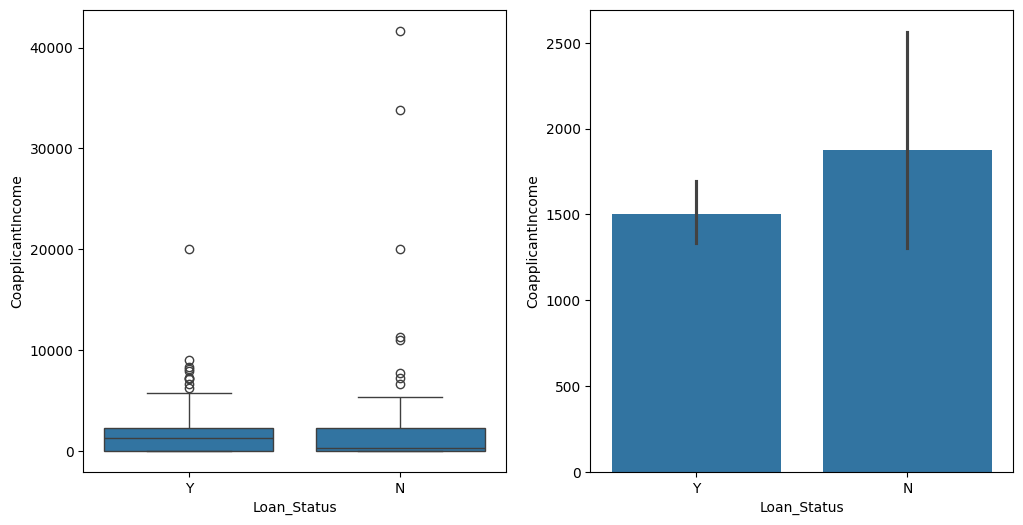

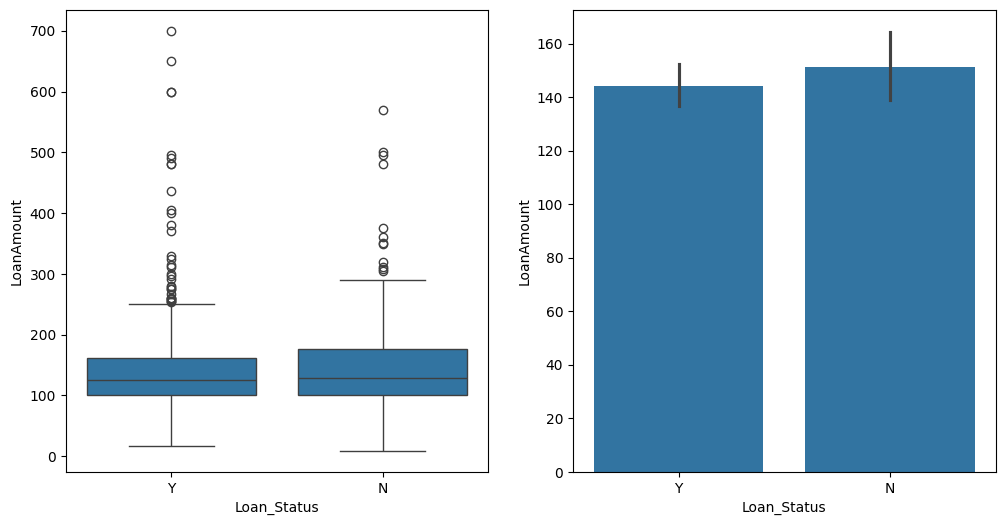

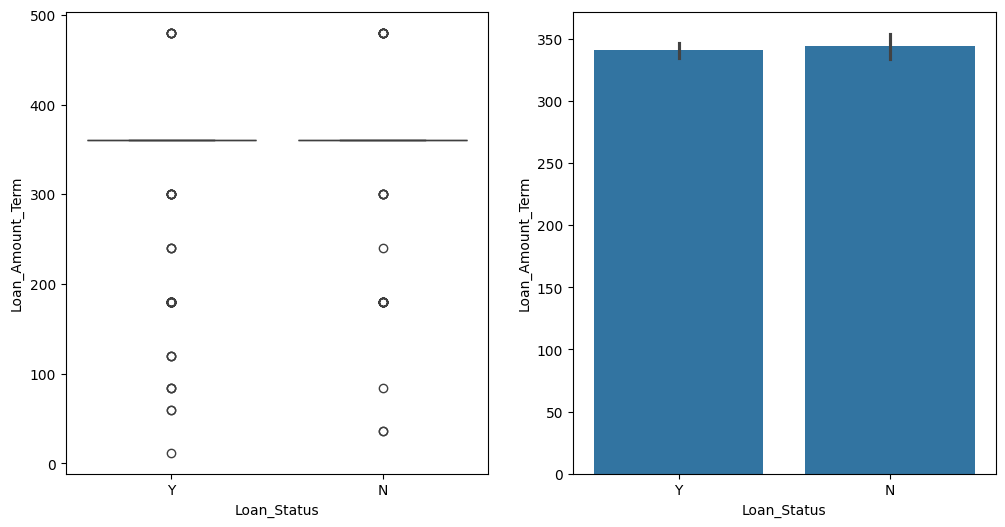

In [15]:
# now lets take a look at how numerical variables affect the loan status.
for l in numerical:
  plt.figure(figsize = (12,6))
  plt.subplot(1,2,1)
  sns.boxplot(x="Loan_Status",y = l,
            data=train)
  plt.subplot(1,2,2)
  sns.barplot(data = train,x = 'Loan_Status',y = l)
  plt.show()





> applicant income and co applicant incomr does not have much effect on approval of the loan.


> loan amount have some but minimal effect on loan status -- higher loan amount have chances of getting rejected.





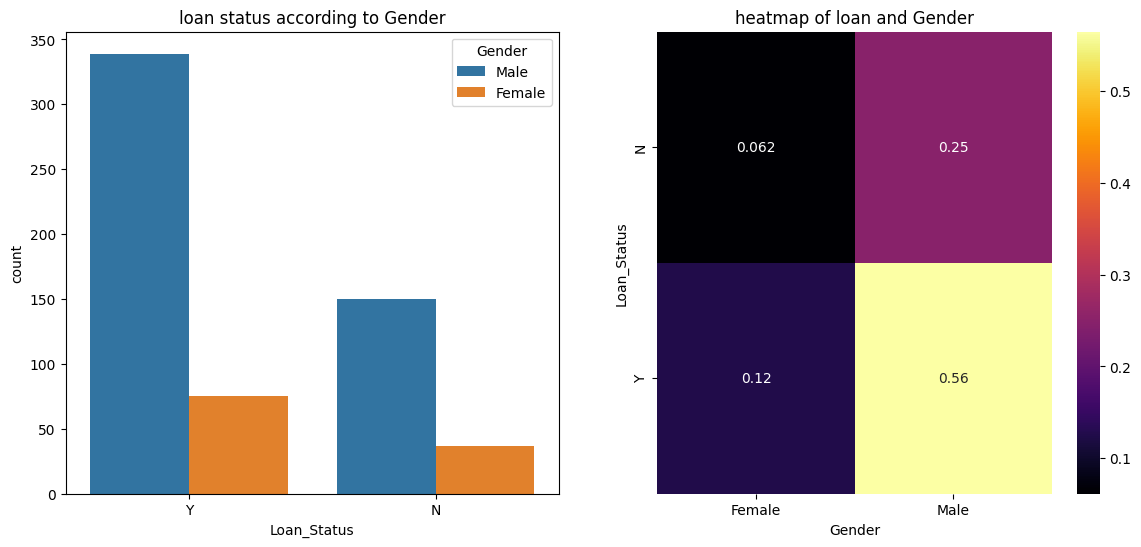

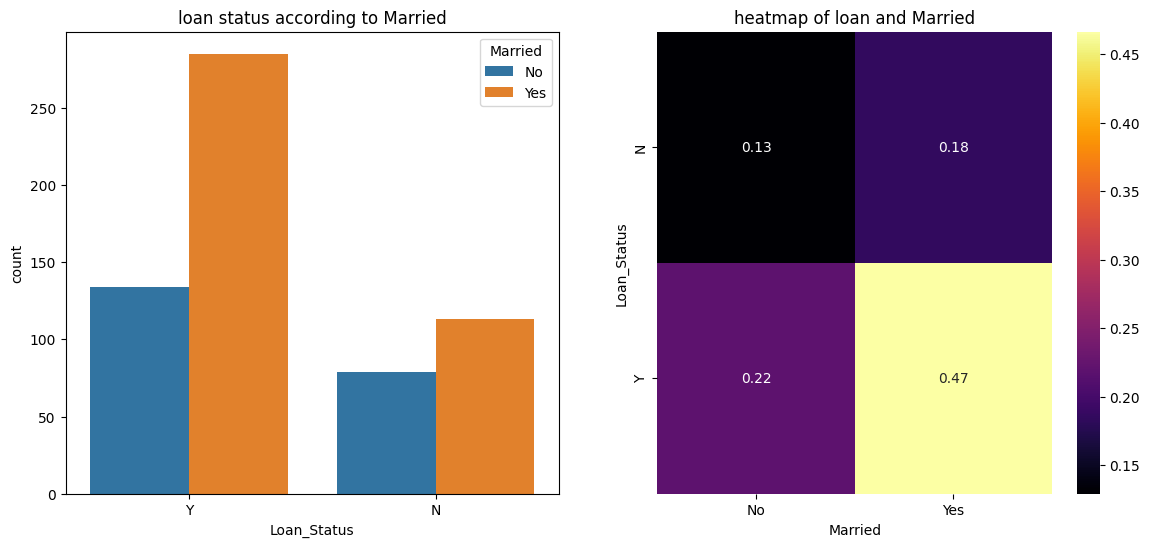

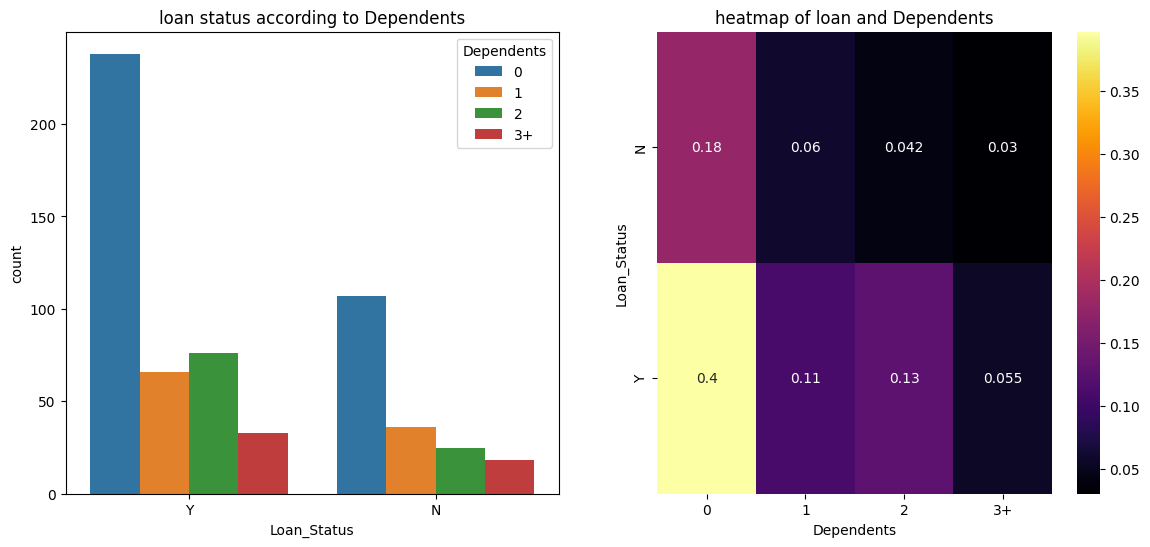

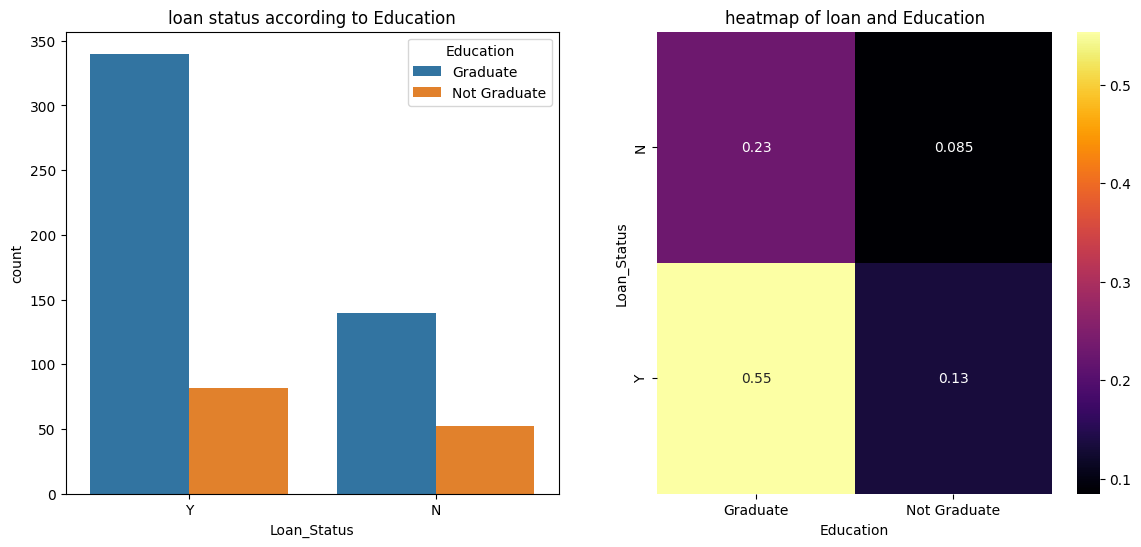

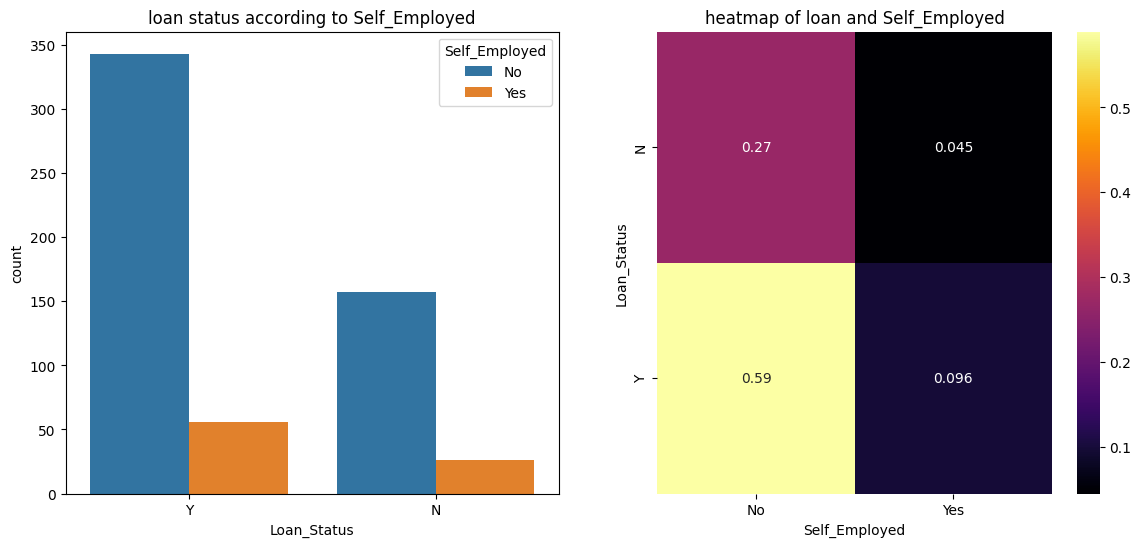

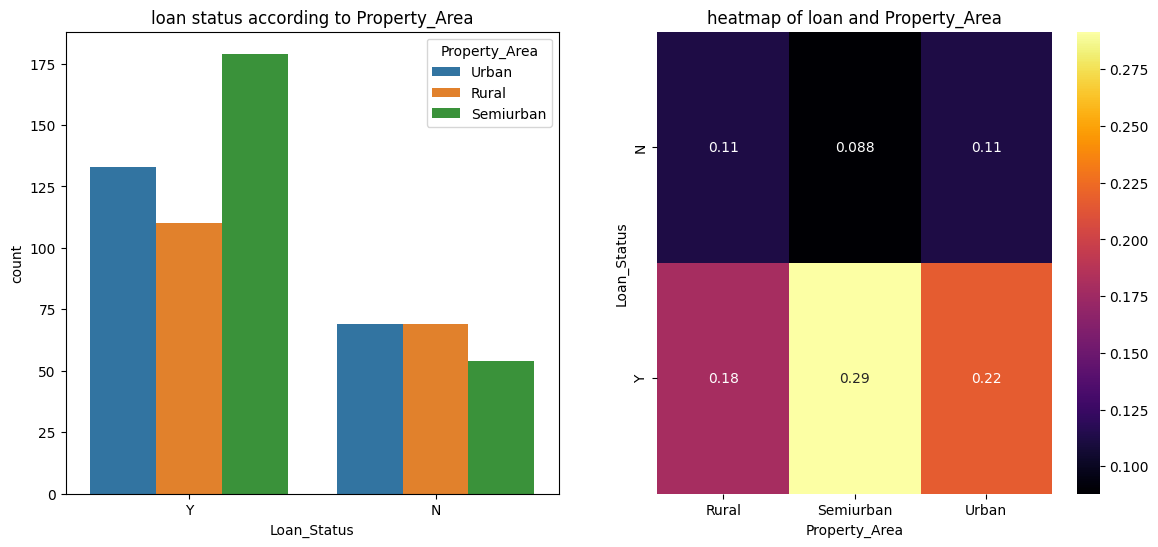

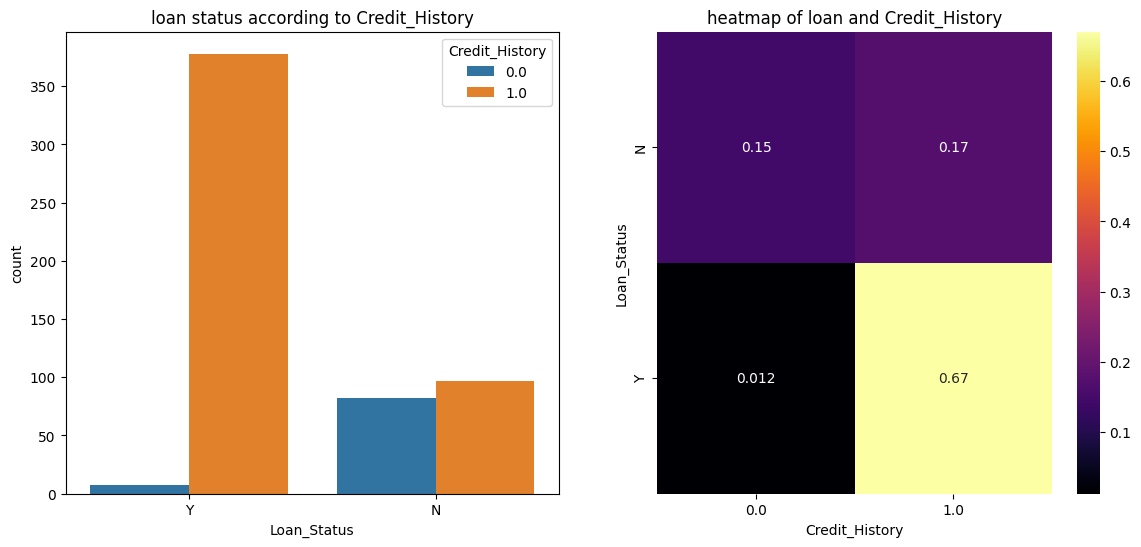

In [16]:
#effect categorical variables have on loan status

for i in categorical:
  plt.figure(figsize = (14,6))
  plt.subplot(1,2,1)
  sns.countplot(x = 'Loan_Status',hue = i,data = train)
  plt.title('loan status according to '+ i)
  plt.subplot(1,2,2)
  cross = pd.crosstab(train['Loan_Status'],train[i],normalize = True)
  sns.heatmap(cross,annot = True,cmap = 'inferno',cbar = True)
  plt.title('heatmap of loan and '+ i)

**observation**



*  approval chances of males and married applicansts are higher.

*   applicants with 0 dependents have more approval possiblity.

*  graduates and applicants who are not self employed but employed  somewhere has more chances of loan getting approved.

* property area does not have much affect and applicants with  credit history 1 has very high chances of loan approval.   











Text(0.5, 1.0, 'heatmap of credit history and dependents')

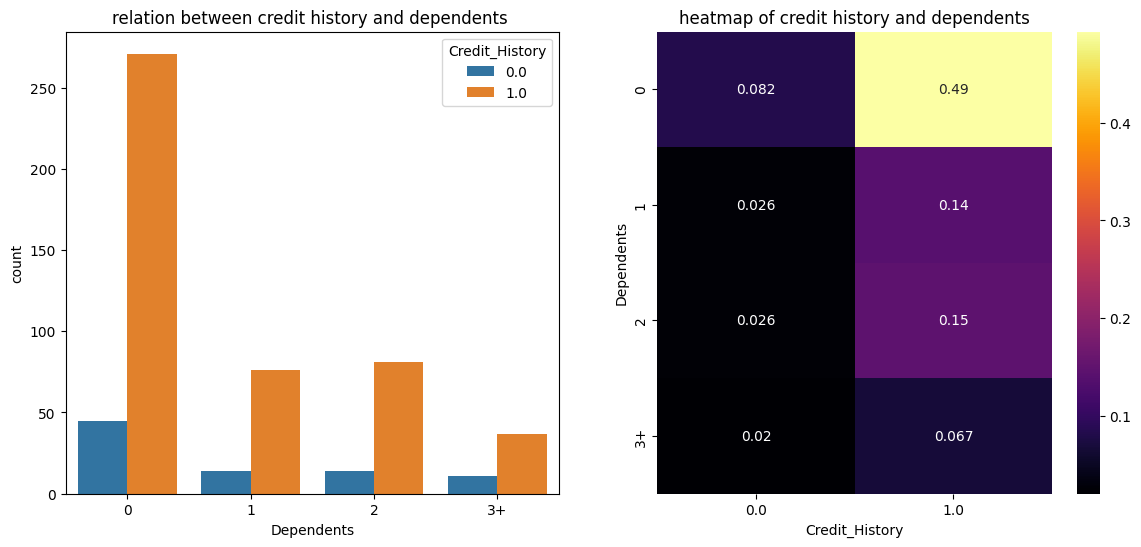

In [17]:
# now also look at what effect variables have on each other
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.countplot(x = 'Dependents',hue = 'Credit_History' ,data = train)
plt.title('relation between credit history and dependents ')
plt.subplot(1,2,2)
cross = pd.crosstab(train['Dependents'],train['Credit_History'],normalize = True)
sns.heatmap(cross,annot = True,cmap = 'inferno',cbar = True)
plt.title('heatmap of credit history and dependents')

<Axes: xlabel='Credit_History', ylabel='Education'>

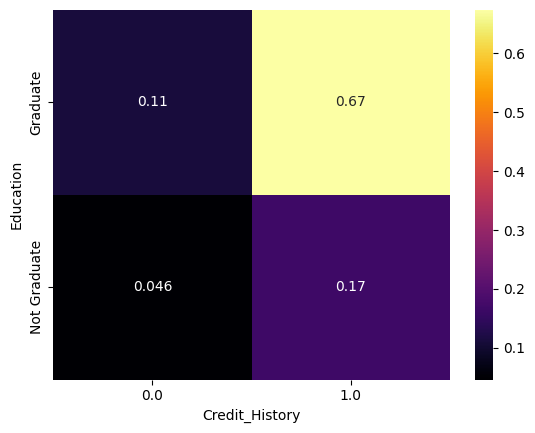

In [18]:
cross = pd.crosstab(train['Education'],train['Credit_History'],normalize = True)
sns.heatmap(cross,annot = True,cmap = 'inferno',cbar = True)


<Axes: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

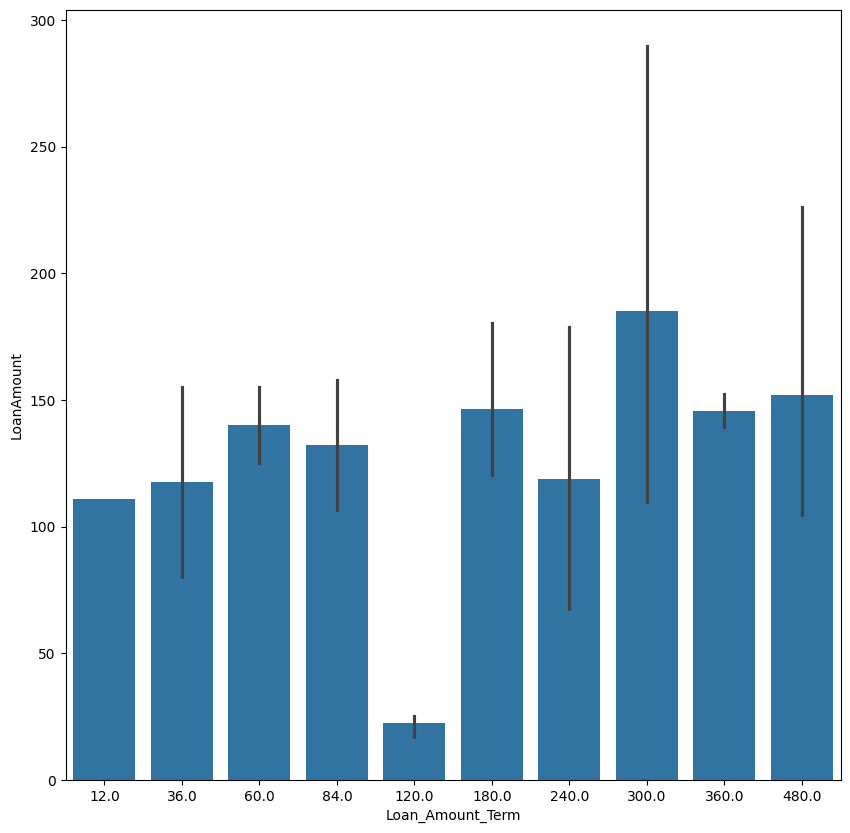

In [96]:
plt.figure(figsize = (10,10))
sns.barplot(data = train,y = 'LoanAmount',x = 'Loan_Amount_Term')

<Axes: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

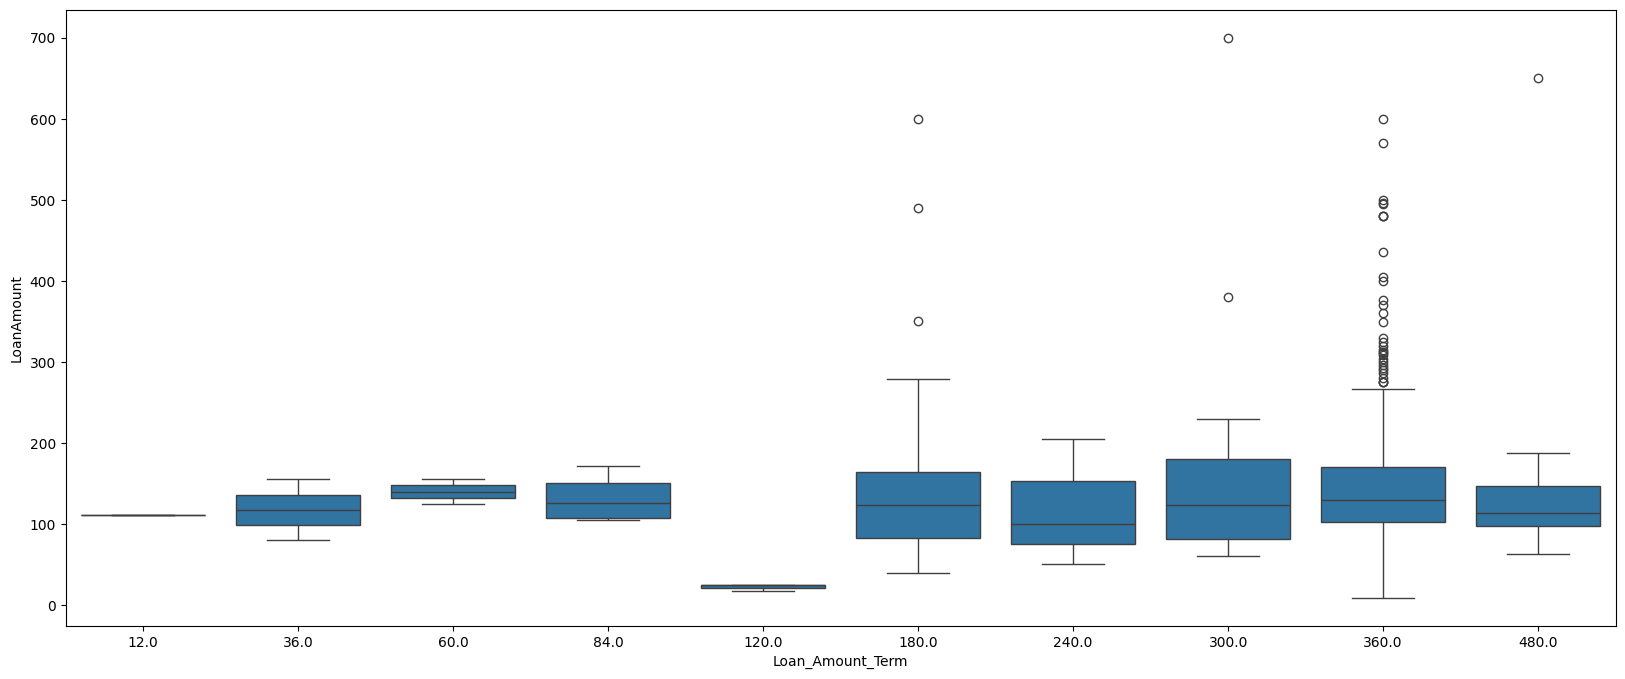

In [20]:
plt.figure(figsize =(20,8))
sns.boxplot(x = "Loan_Amount_Term",y = 'LoanAmount',data = train)

<Axes: xlabel='Loan_Amount_Term', ylabel='ApplicantIncome'>

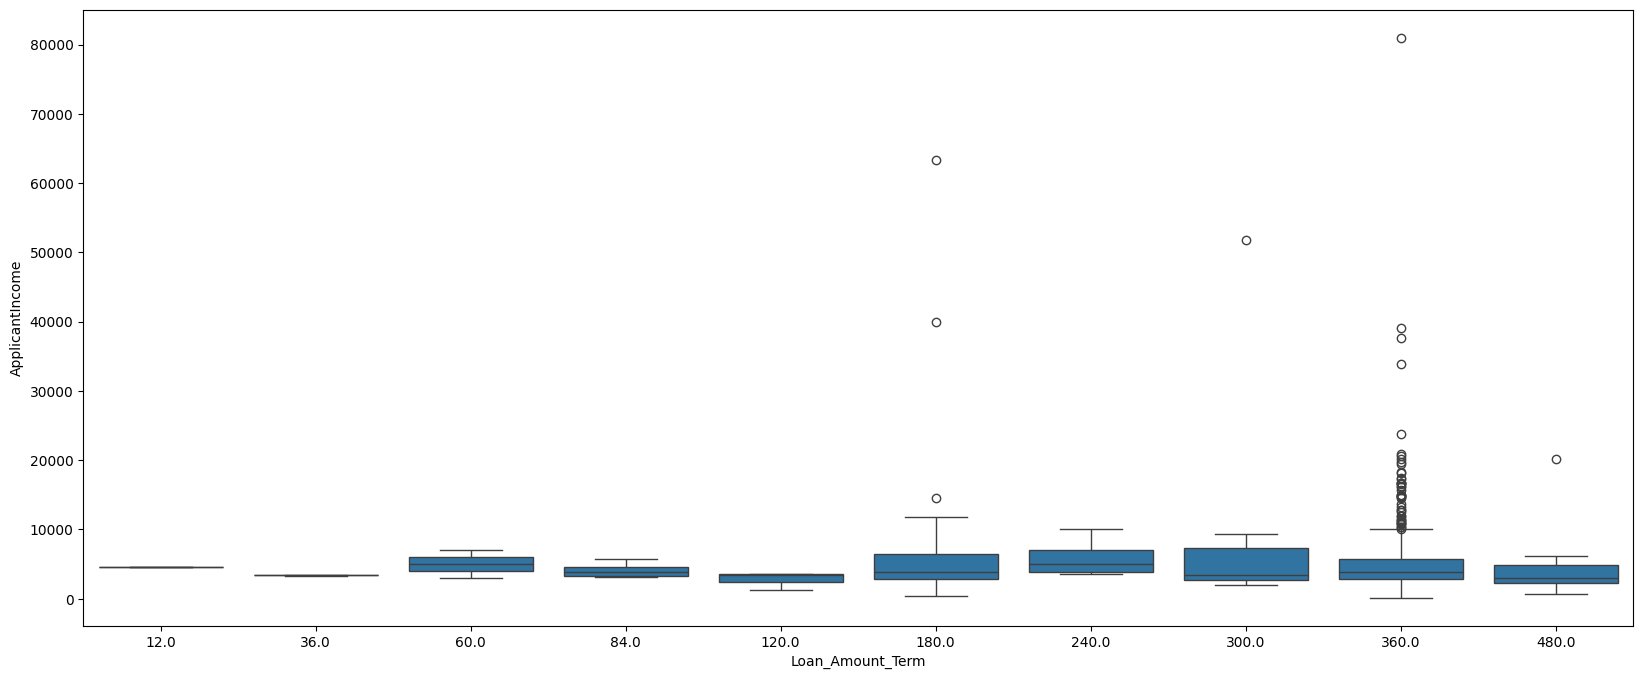

In [97]:
plt.figure(figsize =(20,8))
sns.boxplot(x = "Loan_Amount_Term",y = 'ApplicantIncome',data = train)

<Axes: xlabel='Education', ylabel='LoanAmount'>

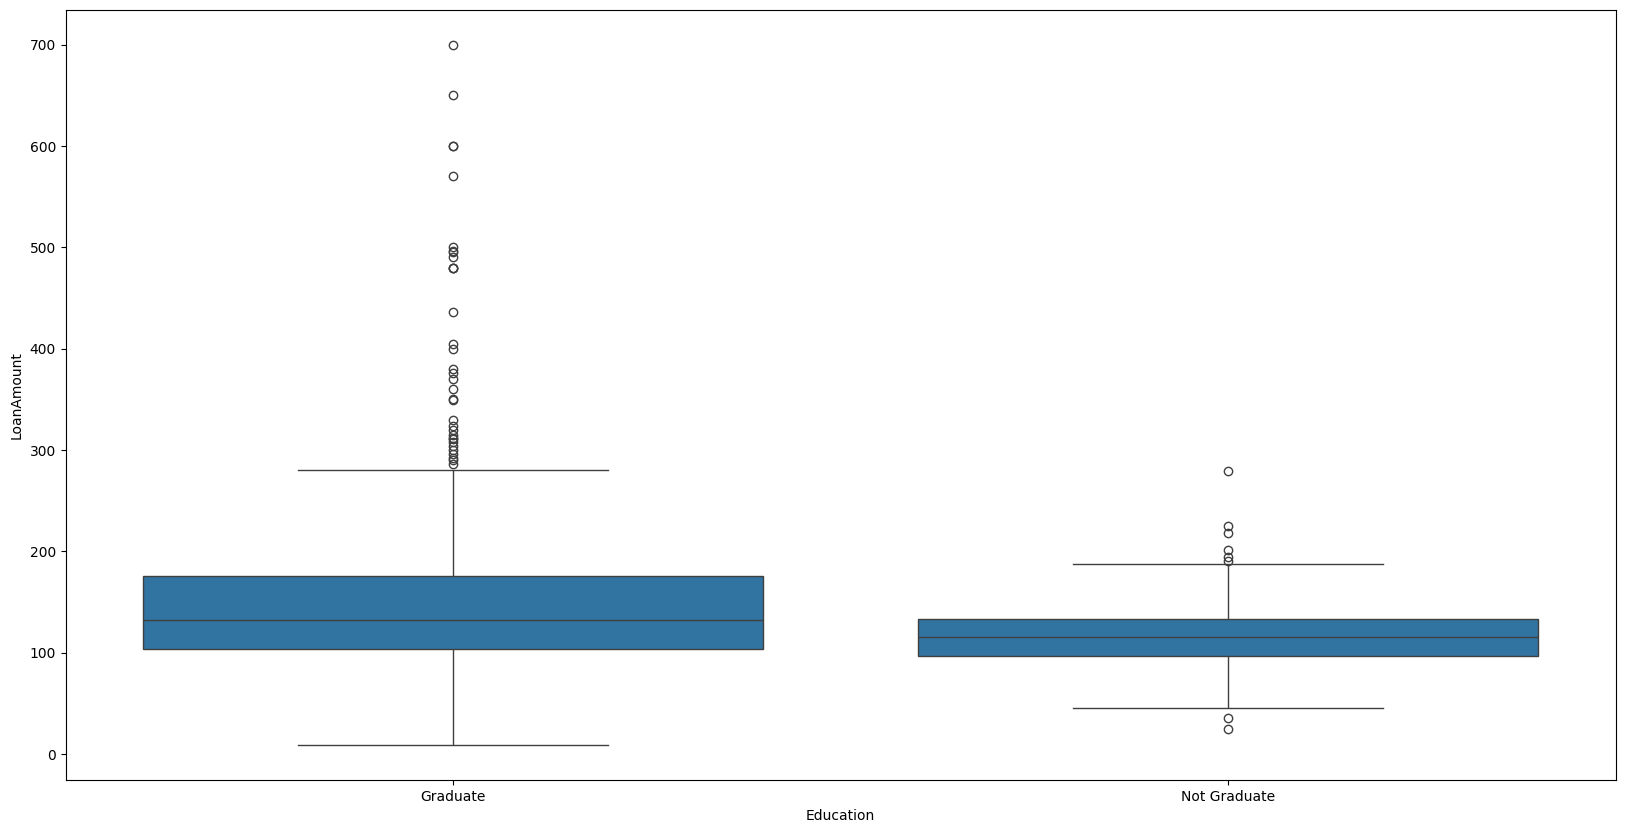

In [21]:
plt.figure(figsize =(20,10))
sns.boxplot(x = "Education",y = 'LoanAmount',data = train)




> graduate applicants has applied for large loan amount with many outliers reaching till 700 as compared to non graduates.



<Axes: xlabel='Dependents', ylabel='LoanAmount'>

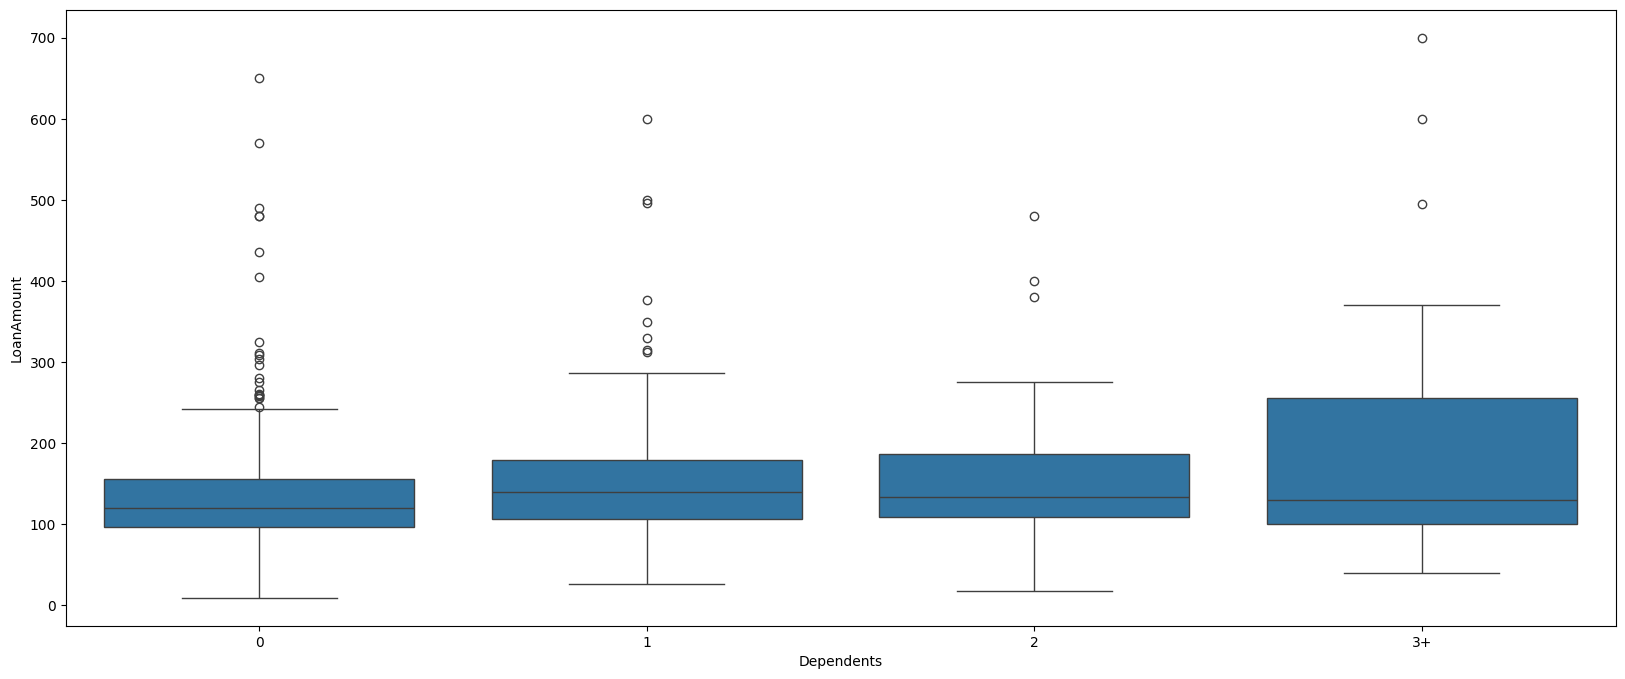

In [22]:
plt.figure(figsize =(20,8))
sns.boxplot(x = "Dependents",y = 'LoanAmount',data = train)

applicants having 3+ dependents have applied for large amount of loan and applicants with 0 dependents have applied for less amount as compared to others but with some outliers ranging from 250+ till 700.

<Axes: xlabel='Gender', ylabel='LoanAmount'>

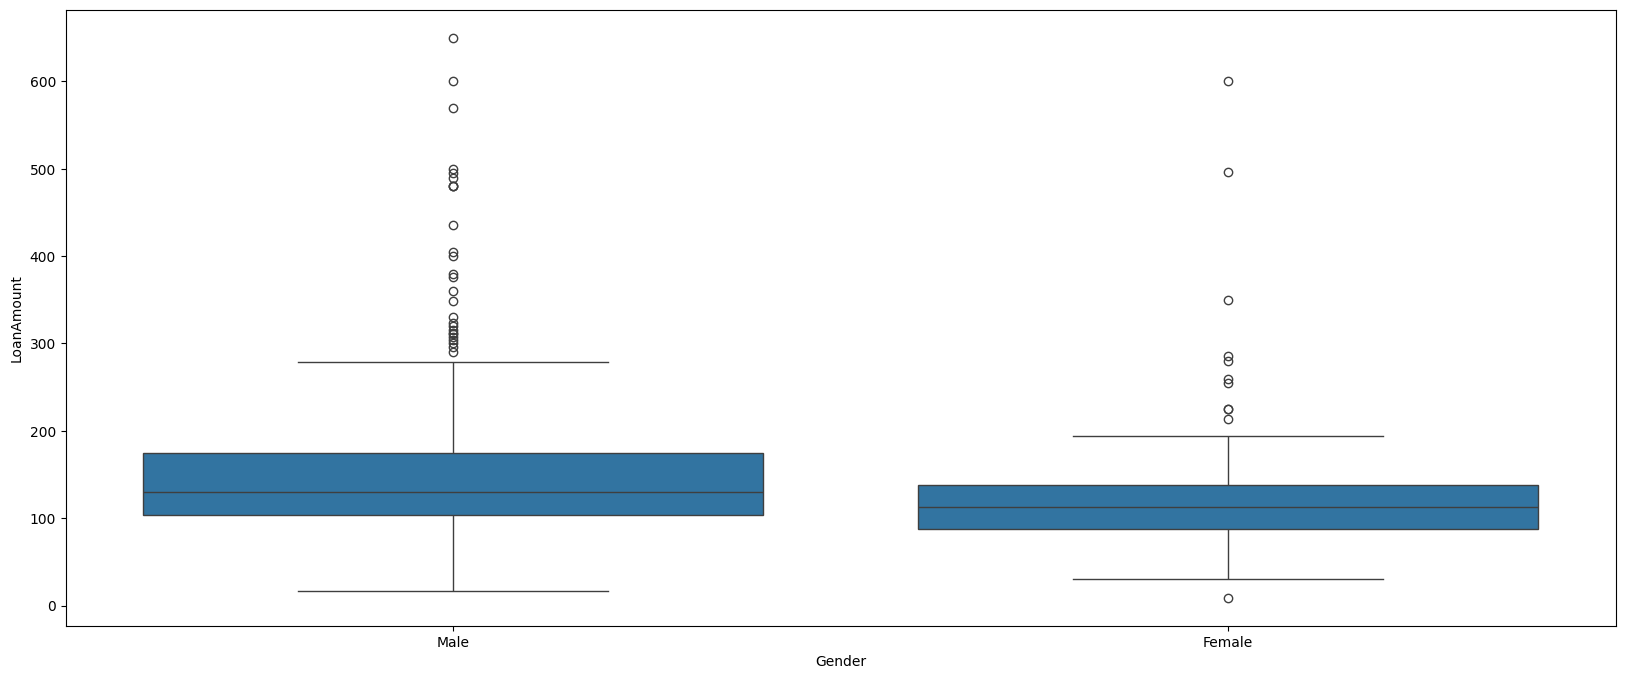

In [23]:
plt.figure(figsize =(20,8))
sns.boxplot(x = "Gender",y = 'LoanAmount',data = train)

males have applied for large loan amount.

<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

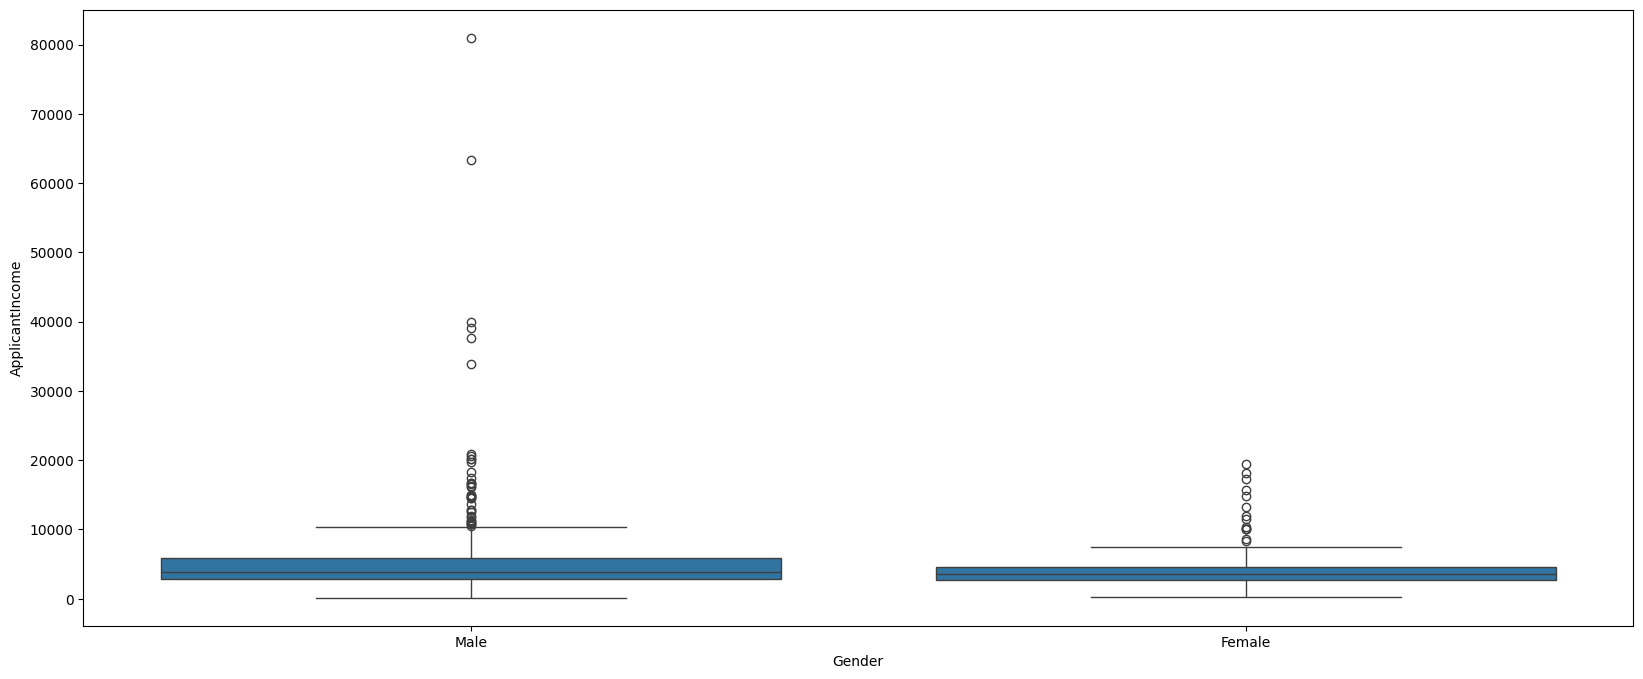

In [24]:
plt.figure(figsize =(20,8))
sns.boxplot(x = "Gender",y = 'ApplicantIncome',data = train)

male applicant have income reaching till 10000 and with some outliers. most female applicants have income less than 10000.

In [98]:
#preprocessing

In [26]:
train.shape

(614, 13)

In [27]:
#first will find null values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

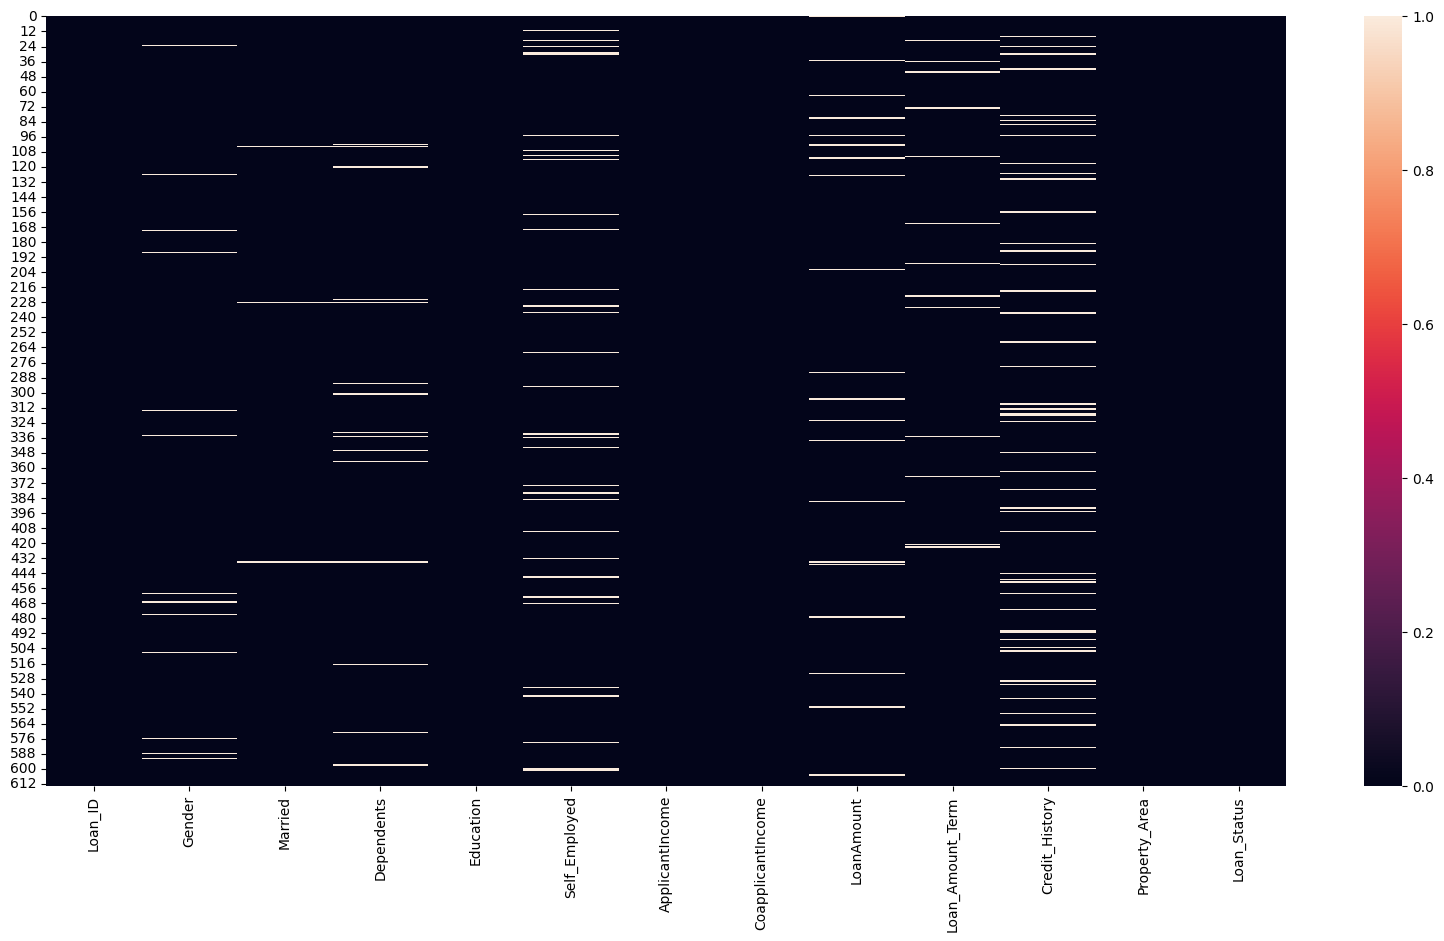

In [28]:
plt.figure(figsize = (20,10))
sns.heatmap(train.isnull(),cbar = True)



> 6 columns has null values gender,dependents,self employed,loan amount,loan amount terms and credit history.



> null values will be replaced by mean and mode of the variables





In [29]:
train.Dependents.fillna(0,inplace = True)
train.Self_Employed.fillna(train.Dependents.mode()[0],inplace = True)
train.LoanAmount.fillna(train.LoanAmount.mode()[0],inplace = True)
train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mode()[0],inplace = True)
train.Credit_History.fillna(train.Credit_History.mode()[0],inplace = True)
train.Married.fillna('No',inplace = True)
train.Gender.fillna('Male',inplace = True)

<Axes: >

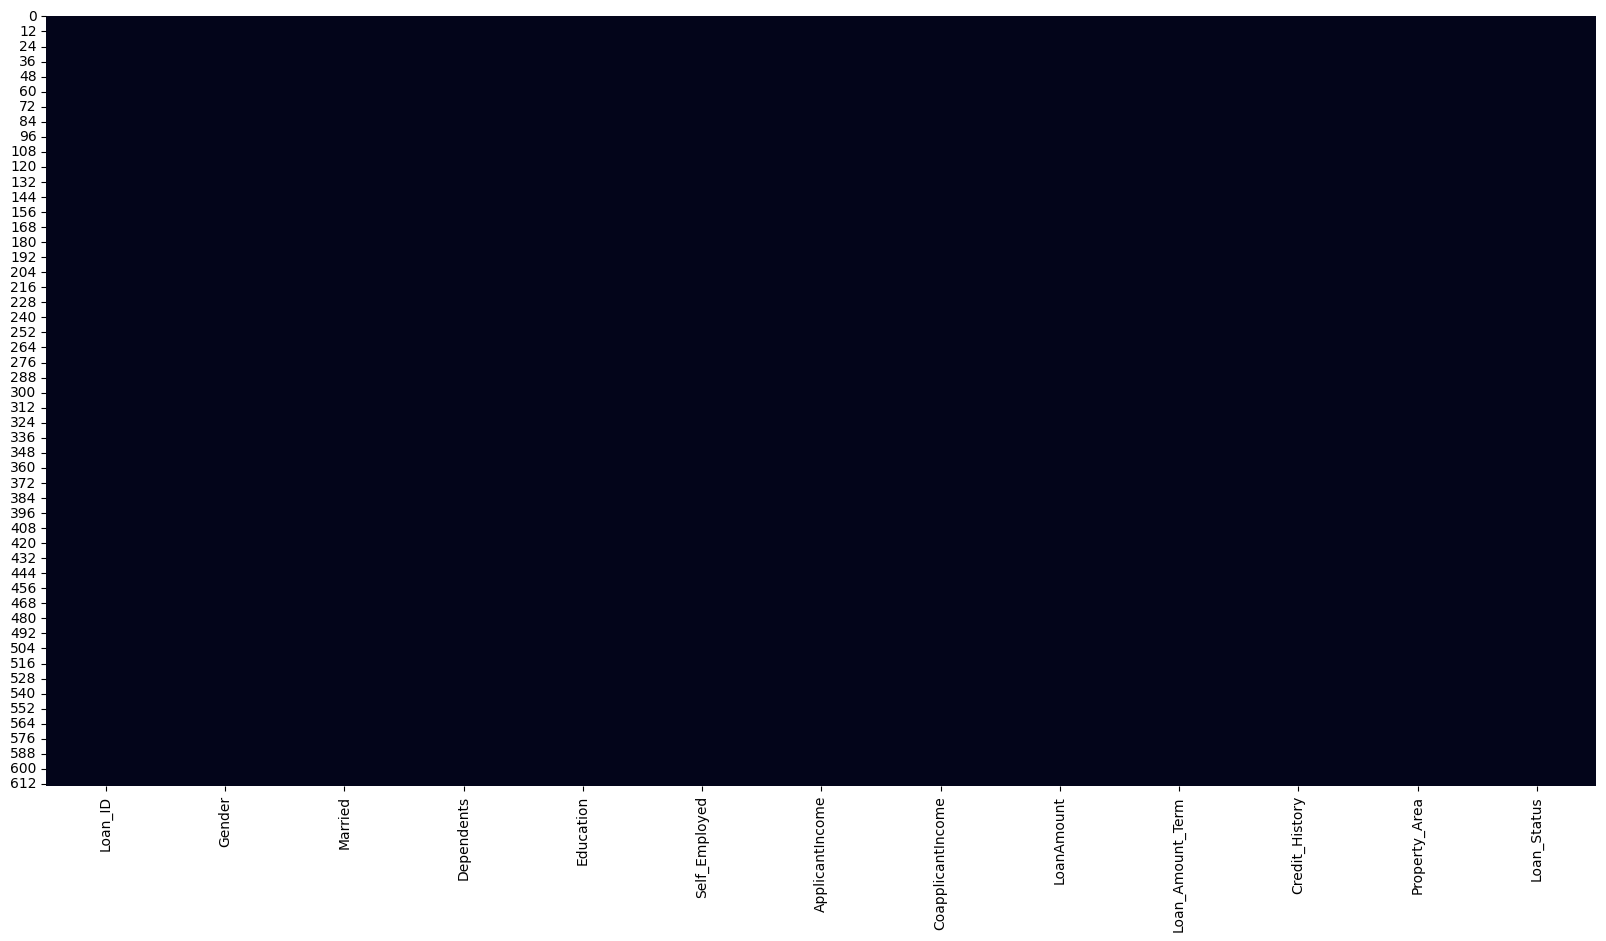

In [30]:
plt.figure(figsize = (20,10))
sns.heatmap(train.isnull(),cbar = False)

In [31]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<Axes: >

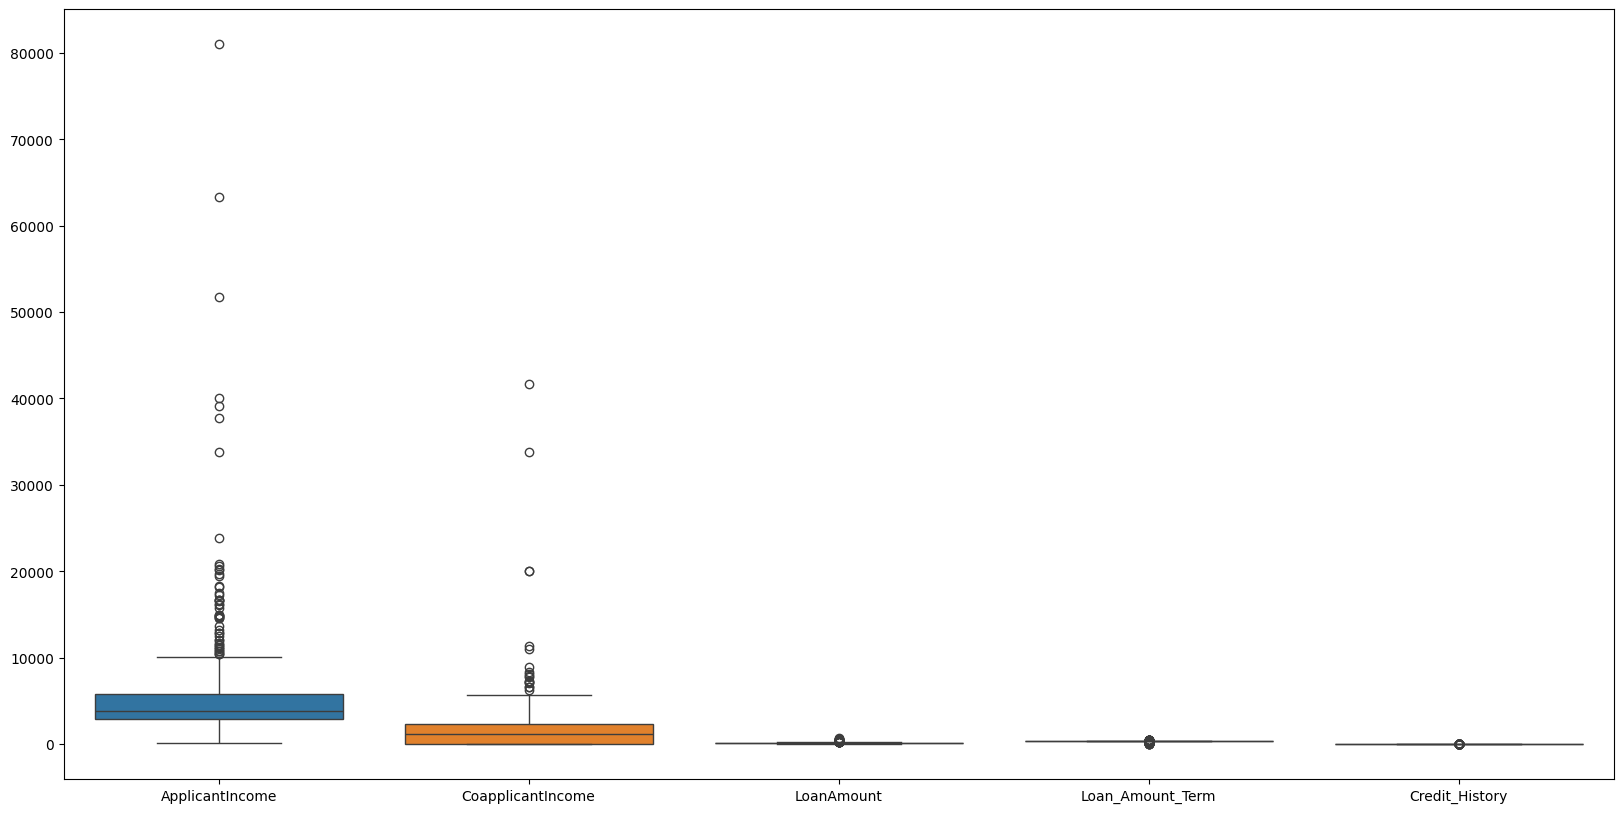

In [32]:
plt.figure(figsize = (20,10))
sns.boxplot(train)



---only applicantincome and co applicant income has outliers.



In [33]:
#treating the outliers

In [34]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,145.465798,84.180967,9.0,100.25,125.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


In [35]:
#IQR method
Q1 = train['ApplicantIncome'].quantile(0.25)
Q3 = train['ApplicantIncome'].quantile(0.75)
print(Q1,',',Q3)
Iqr = Q3 - Q1
print('Iqr:',Iqr)

2877.5 , 5795.0
Iqr: 2917.5


In [36]:
lower_limit = Q1 - 1.5*Iqr
upper_limit = Q3 + 1.5*Iqr
print('lower Limit:',lower_limit,' and upper limit :',upper_limit)

lower Limit: -1498.75  and upper limit : 10171.25


In [37]:
outliers = train.ApplicantIncome[(train['ApplicantIncome'] < lower_limit) | (train['ApplicantIncome'] > upper_limit)]

In [38]:
print(outliers)

9      12841
34     12500
54     11500
67     10750
102    13650
106    11417
115    14583
119    10408
126    23803
128    10513
130    20166
138    14999
144    11757
146    14866
155    39999
171    51763
183    33846
185    39147
191    12000
199    11000
254    16250
258    14683
271    11146
278    14583
284    20667
308    20233
324    15000
333    63337
369    19730
370    15759
409    81000
424    14880
432    12876
438    10416
443    37719
467    16692
475    16525
478    16667
483    10833
487    18333
493    17263
506    20833
509    13262
525    17500
533    11250
534    18165
561    19484
572    16666
594    16120
604    12000
Name: ApplicantIncome, dtype: int64


In [39]:
outliers.shape

(50,)

In [40]:
train1 = train.copy()
train1.loc[train1['ApplicantIncome'] > upper_limit,['ApplicantIncome']] = upper_limit
train1.loc[train1['ApplicantIncome'] < lower_limit,['ApplicantIncome']] = lower_limit

<Axes: ylabel='CoapplicantIncome'>

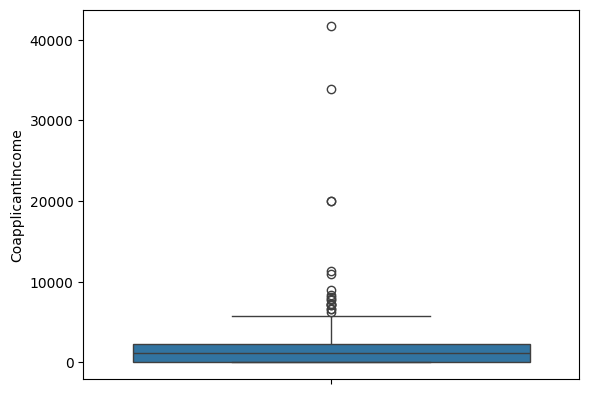

In [41]:
sns.boxplot(train.CoapplicantIncome)

<Axes: ylabel='LoanAmount'>

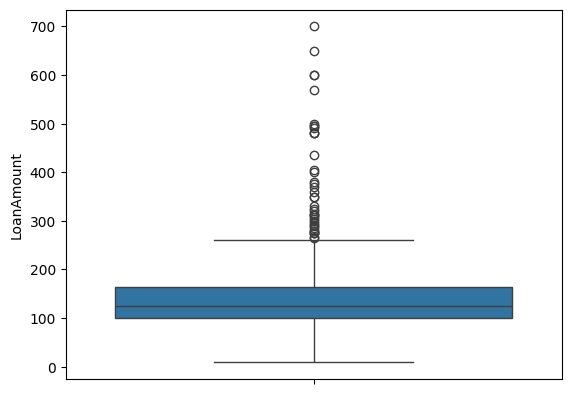

In [42]:
sns.boxplot(train.LoanAmount)

In [43]:
Q1 = train['CoapplicantIncome'].quantile(0.25)
Q3 = train['CoapplicantIncome'].quantile(0.75)
print(Q1,',',Q3)
Iqr = Q3 - Q1
print('Iqr for coapplicantIncome:',Iqr)

0.0 , 2297.25
Iqr for coapplicantIncome: 2297.25


In [44]:
lower_limit1 = Q1 - 1.5*Iqr
upper_limit1 = Q3 + 1.5*Iqr
print('lower Limit for coapplicantIncome:',lower_limit1)
print('upper limit for coapplicantIncome:',upper_limit1)

lower Limit for coapplicantIncome: -3445.875
upper limit for coapplicantIncome: 5743.125


In [45]:
co_outliers = train.ApplicantIncome[(train['CoapplicantIncome'] < lower_limit1) | (train['CoapplicantIncome'] > upper_limit1)]

In [46]:
co_outliers.shape

(18,)

In [47]:
print(co_outliers)

9      12841
12      3073
38      4166
122     2137
135     4000
177     5516
180     6400
253     2661
349     2625
372     9323
402     2500
417     1600
444     7333
506    20833
513     2130
523     7948
581     1836
600      416
Name: ApplicantIncome, dtype: int64


In [48]:
train1.loc[train1['CoapplicantIncome'] > upper_limit1,['CoapplicantIncome']] = upper_limit1
train1.loc[train1['CoapplicantIncome'] < lower_limit1,['CoapplicantIncome']] = lower_limit1

In [49]:
q1 = train['LoanAmount'].quantile(0.25)
q3 = train['LoanAmount'].quantile(0.75)
IQR = q3 - q1
print(q1,q3)
print('IQR for Loan Amount :',IQR)

100.25 164.75
IQR for Loan Amount : 64.5


In [50]:
lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR
print('lower limit of loan amount :',lower)
print('upper limit of loan amount :',upper)

lower limit of loan amount : 3.5
upper limit of loan amount : 261.5


In [51]:
train1.loc[train1['LoanAmount'] > upper,['LoanAmount']] = upper
train1.loc[train1['LoanAmount'] < lower,['LoanAmount']] = lower


<Axes: >

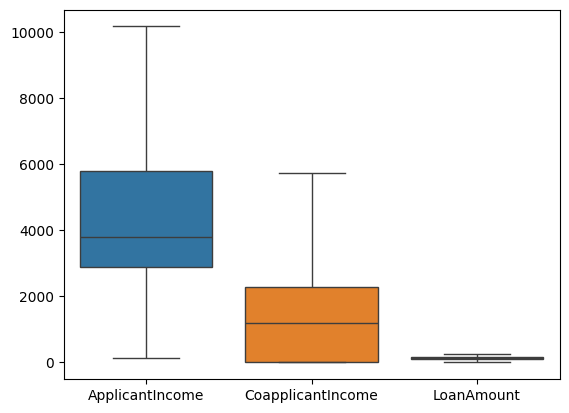

In [52]:
sns.boxplot(train1[['ApplicantIncome','CoapplicantIncome','LoanAmount']])

<Axes: ylabel='LoanAmount'>

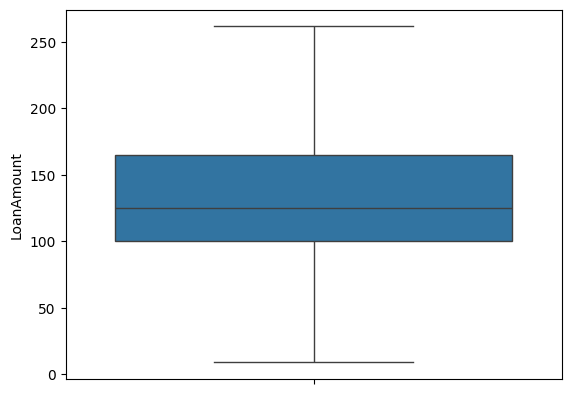

In [53]:
sns.boxplot(train1['LoanAmount'])

In [54]:
#feature engineering and feature selection

train1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [55]:
train1.drop(['Loan_ID'],axis = 1,inplace = True)

In [56]:
train1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [57]:
train1['TotalIncome'] = train1.ApplicantIncome + train1.CoapplicantIncome

In [58]:
train1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,5849.0,0.0,120.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y,7583.0


In [59]:
train1.drop(['ApplicantIncome','CoapplicantIncome'],axis = 1 ,inplace = True )

In [60]:
train1

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,120.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,Y,2900.0
610,Male,Yes,3+,Graduate,No,40.0,180.0,1.0,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,Y,7583.0


In [61]:
categorical.remove('Credit_History')

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
LE = LabelEncoder()
for i in categorical:
  train1[i] = train1[i].astype(str)
  train1[i] = LE.fit_transform(train1[i])

In [64]:
train1

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,1,120.0,360.0,1.0,2,Y,5849.0
1,1,1,1,0,1,128.0,360.0,1.0,0,N,6091.0
2,1,1,0,0,2,66.0,360.0,1.0,2,Y,3000.0
3,1,1,0,1,1,120.0,360.0,1.0,2,Y,4941.0
4,1,0,0,0,1,141.0,360.0,1.0,2,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,1,71.0,360.0,1.0,0,Y,2900.0
610,1,1,3,0,1,40.0,180.0,1.0,0,Y,4106.0
611,1,1,1,0,1,253.0,360.0,1.0,2,Y,8312.0
612,1,1,2,0,1,187.0,360.0,1.0,2,Y,7583.0


In [69]:
train1['LoanAmount'] = np.log(train1['LoanAmount'])
train1['Loan_Amount_Term'] = np.log(train['Loan_Amount_Term'])
train1['TotalIncome'] = np.log(train1['TotalIncome'])
train1['Loan_Status'] = LE.fit_transform(train1['Loan_Status'])

In [70]:
train1

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,1,0.448529,5.886104,1.0,2,1,0.770262
1,1,1,1,0,1,0.457043,5.886104,1.0,0,0,0.772419
2,1,1,0,0,2,0.359504,5.886104,1.0,2,1,0.732482
3,1,1,0,1,1,0.448529,5.886104,1.0,2,1,0.761129
4,1,0,0,0,1,0.469464,5.886104,1.0,2,1,0.771620
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,1,0.371493,5.886104,1.0,0,1,0.730440
610,1,1,3,0,1,0.266450,5.192957,1.0,0,1,0.750796
611,1,1,1,0,1,0.536961,5.886104,1.0,2,1,0.788480
612,1,1,2,0,1,0.503573,5.886104,1.0,2,1,0.783822


In [73]:
correlation = train1.corr()
correlation

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
Gender,1.000000,0.367389,0.172914,0.045364,0.021135,0.150204,-0.054087,0.009170,-0.025752,0.017987,0.210117
Married,0.367389,1.000000,0.340684,0.017671,0.028934,0.170418,-0.069623,0.006690,0.000395,0.084281,0.191717
Dependents,0.172914,0.340684,1.000000,0.055752,0.052597,0.129423,-0.078469,-0.040160,-0.000244,0.010118,0.085439
Education,0.045364,0.017671,0.055752,1.000000,0.000820,-0.105378,-0.062852,-0.073658,-0.065243,-0.085884,-0.201473
Self_Employed,0.021135,0.028934,0.052597,0.000820,1.000000,0.065441,-0.019219,-0.041027,-0.028730,-0.011332,0.153808
LoanAmount,0.150204,0.170418,0.129423,-0.105378,0.065441,1.000000,0.102747,-0.029470,-0.114230,-0.027055,0.595974
Loan_Amount_Term,-0.054087,-0.069623,-0.078469,-0.062852,-0.019219,0.102747,1.000000,-0.015513,-0.082927,-0.008157,-0.020218
Credit_History,0.009170,0.006690,-0.040160,-0.073658,-0.041027,-0.029470,-0.015513,1.000000,0.001963,0.540556,0.031834
Property_Area,-0.025752,0.000395,-0.000244,-0.065243,-0.028730,-0.114230,-0.082927,0.001963,1.000000,0.032112,-0.085930
Loan_Status,0.017987,0.084281,0.010118,-0.085884,-0.011332,-0.027055,-0.008157,0.540556,0.032112,1.000000,0.038728


<Axes: >

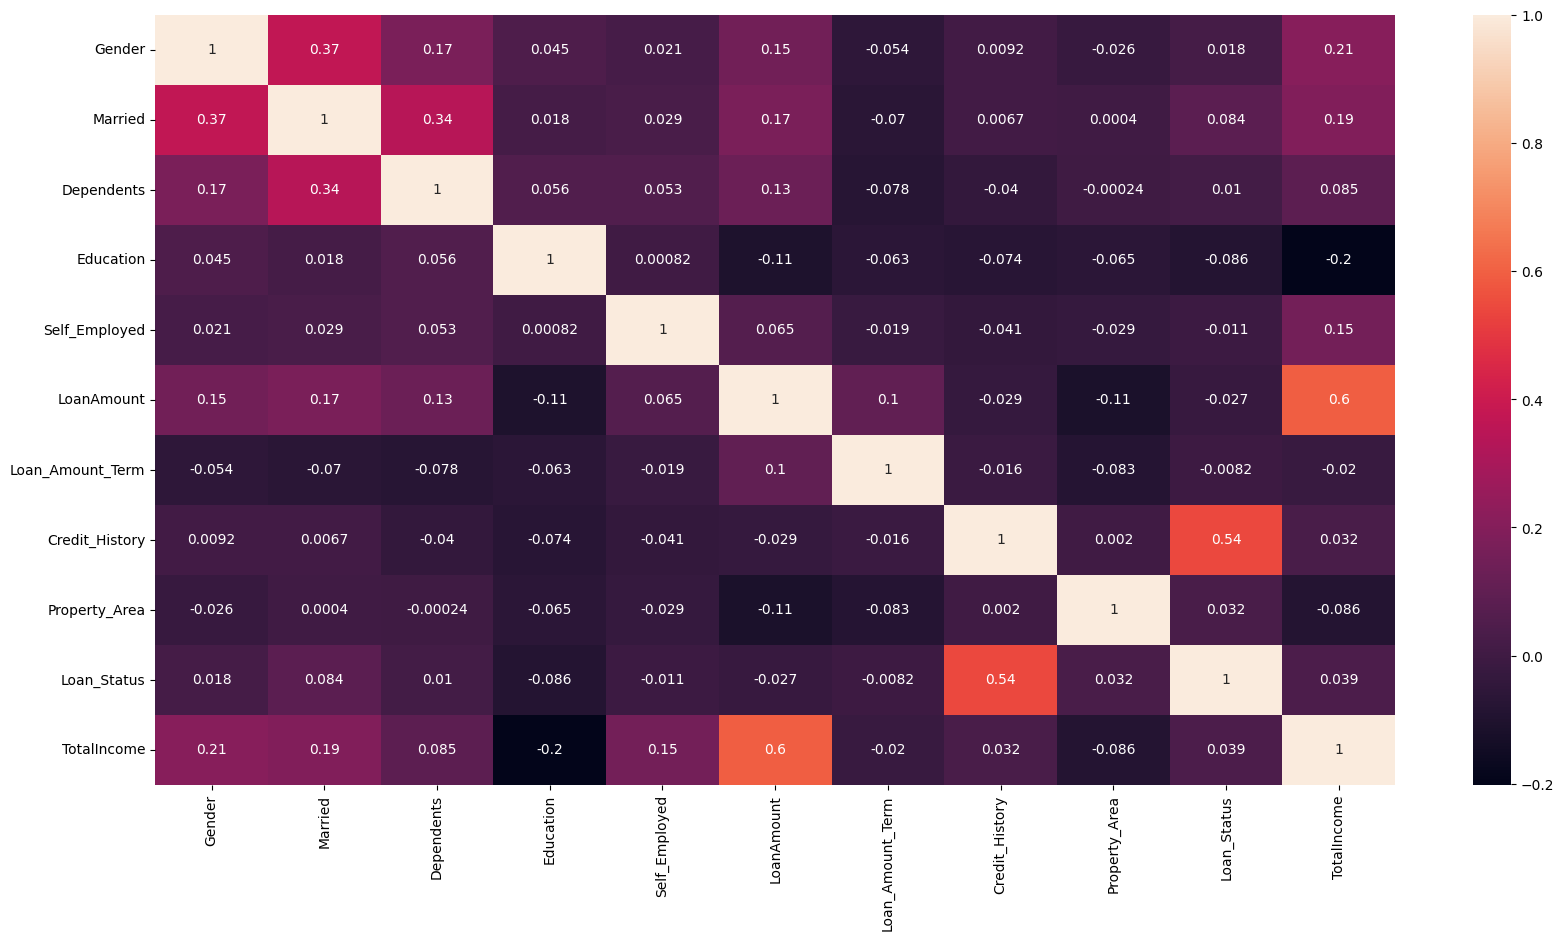

In [77]:
plt.figure(figsize = (20,10))
sns.heatmap(correlation,annot =True)

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,precision_score,recall_score

In [80]:
X = train1.drop('Loan_Status',axis = 1)
y = train1['Loan_Status']

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [87]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [95]:
prediction = model.predict(X_test)
accuracy = accuracy_score(y_test,prediction)
precision = precision_score(y_test,prediction)
recall = recall_score(y_test,prediction)

print('accuracy of the mode is :',accuracy*100)
print('precision of the mode is :',precision*100)
print('recall score of the mode is :',recall*100)

accuracy of the mode is : 78.37837837837837
precision of the mode is : 75.64102564102564
recall score of the mode is : 98.33333333333333
